In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# **First View of Dataset**

---



In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


**From the information that dataset taken from ([Kaggle address](https://www.kaggle.com/datasets/mirichoi0218/insurance)):**


*  age(int64): age of primary beneficiary 
*  sex(object): insurance contractor gender, female, male
*  bmi(float64): Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children(int64): Number of children covered by health insurance / Number of dependents
* smoker(object): Smoking
* region(object): the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges(float64)(***target column***): Individual medical costs billed by health insurance





# **EDA(Exploratory Data Analysis)**

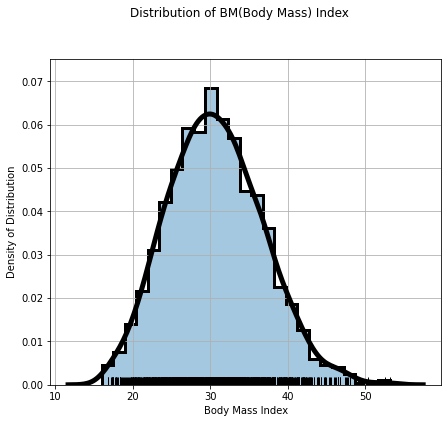

In [4]:
## The code below gives us the distrubition of BMI around our dataset.

fig= plt.figure(figsize=(7,6))

sns.distplot(df["bmi"])

sns.distplot(df["bmi"], rug=True, rug_kws={"color": "black"},
                  kde_kws={"color": "black", "lw": 5, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"})

fig.suptitle('Distribution of BM(Body Mass) Index', y=1)
plt.xlabel("Body Mass Index")
plt.ylabel("Density of Distribution")


plt.grid(True)

plt.show();

***Above plot tells us that, we can conclude BMI is Normally Distributed around the dataset.***

<Figure size 432x288 with 0 Axes>

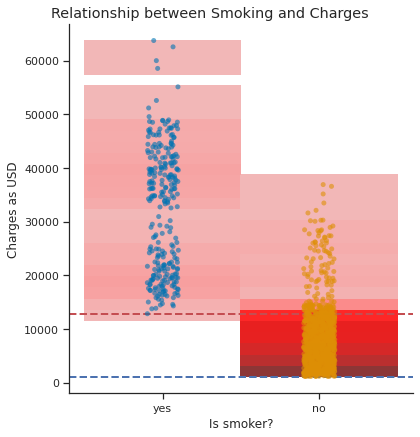

In [5]:
## Let's explore the relations between "smoker" and "charges" column.

sns.set_palette("Paired")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.despine(offset=30, trim=True,left=True)

sns.catplot(data=df,x="smoker",y="charges",palette="colorblind",alpha=.6, height=6)
sns.histplot(data=df,x="smoker",y="charges",color="red")

plt.axhline(df[df["smoker"]=="yes"].charges.min(), ls='--', color='r', lw=2)
plt.axhline(df[df["smoker"]=="no"].charges.min(), ls='--', color='b', lw=2)

plt.suptitle('Relationship between Smoking and Charges', y=1.01)
plt.xlabel("Is smoker?")
plt.ylabel("Charges as USD")

fig.tight_layout()
plt.show();

In [6]:
## Difference between minimum charge of smoker and non-smoker

print("Non-smoker minimum charge: {} ".format(str(df[df["smoker"]=="no"].charges.min())))
print("Smoker minimum charge: {} ".format(str(df[df["smoker"]=="yes"].charges.min())))
print("Difference in the context of minimum charges: 11K USD")

Non-smoker minimum charge: 1121.8739 
Smoker minimum charge: 12829.4551 
Difference in the context of minimum charges: 11K USD


***As we can see from above plot and calculations, smoking affects directly to charges.***

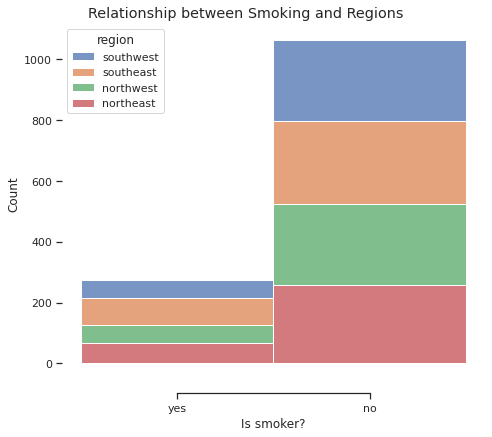

In [7]:

fig= plt.figure(figsize=(7,6))

sns.set_palette("Paired")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

sns.histplot(binwidth=0.5, x="smoker", hue="region", data=df, stat="count", multiple="stack")
sns.despine(offset=30, trim=True,left=True)

plt.suptitle('Relationship between Smoking and Regions', y=1.01)
plt.xlabel("Is smoker?")

plt.tight_layout()
plt.show();

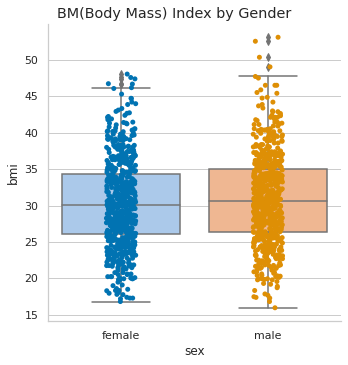

In [8]:
sns.set_palette("Paired")
sns.set_theme(style="whitegrid", palette="pastel")

sns.catplot(data=df,x="sex",y="bmi",palette="colorblind")
sns.boxplot(data=df,x="sex",y="bmi")

plt.suptitle('BM(Body Mass) Index by Gender', y=1.01)

plt.tight_layout()
plt.show();